In [5]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from google.colab import files

files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"vishnudeepmr","key":"f573025c2d8df1be2e3c97fc12616261"}'}

In [9]:
import opendatasets as od
import pandas as pd
  
od.download(
    "https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vishnudeepmr
Your Kaggle Key: ··········


100%|██████████| 28.9M/28.9M [00:00<00:00, 66.5MB/s]


In [11]:
import seaborn as sns

import pandas as pd
import numpy as np 
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from matplotlib import pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [10]:
df=pd.read_csv("/content/credit-card-fraud/card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


<Axes: xlabel='fraud', ylabel='count'>

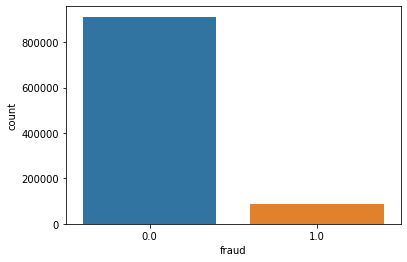

In [12]:
sns.countplot(data=df,x="fraud")

<Axes: xlabel='online_order', ylabel='count'>

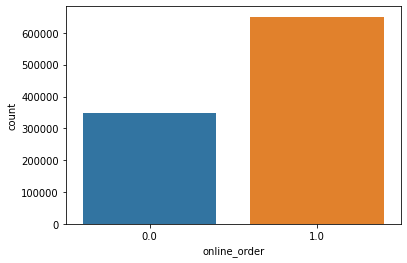

In [19]:
sns.countplot(data=df,x="online_order")

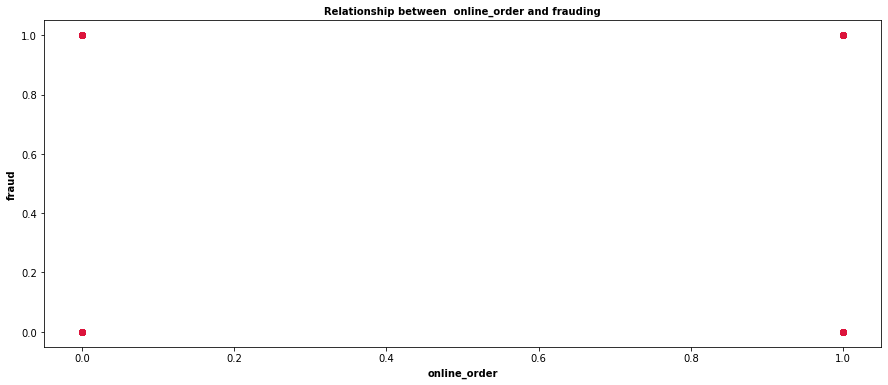

In [20]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'online_order', y = 'fraud', data = df, color='crimson', alpha=0.4)
plt.title('Relationship between  online_order and frauding', weight = 'bold', fontsize = 10)
plt.xlabel('online_order', weight = 'bold')
plt.ylabel('fraud', weight = 'bold')
plt.show()

In [18]:
cor=df.corr()["fraud"].sort_values().to_frame().head(10)

cmap = sns.light_palette("cyan", as_cmap = True)

s = cor.style.background_gradient(cmap = cmap)

s

,fraud
used_pin_number,-0.100293
used_chip,-0.060975
repeat_retailer,-0.001357
distance_from_last_transaction,0.091917
distance_from_home,0.187571
online_order,0.191973
ratio_to_median_purchase_price,0.462305
fraud,1.000000


In [22]:
df1 = df.copy()

df1.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


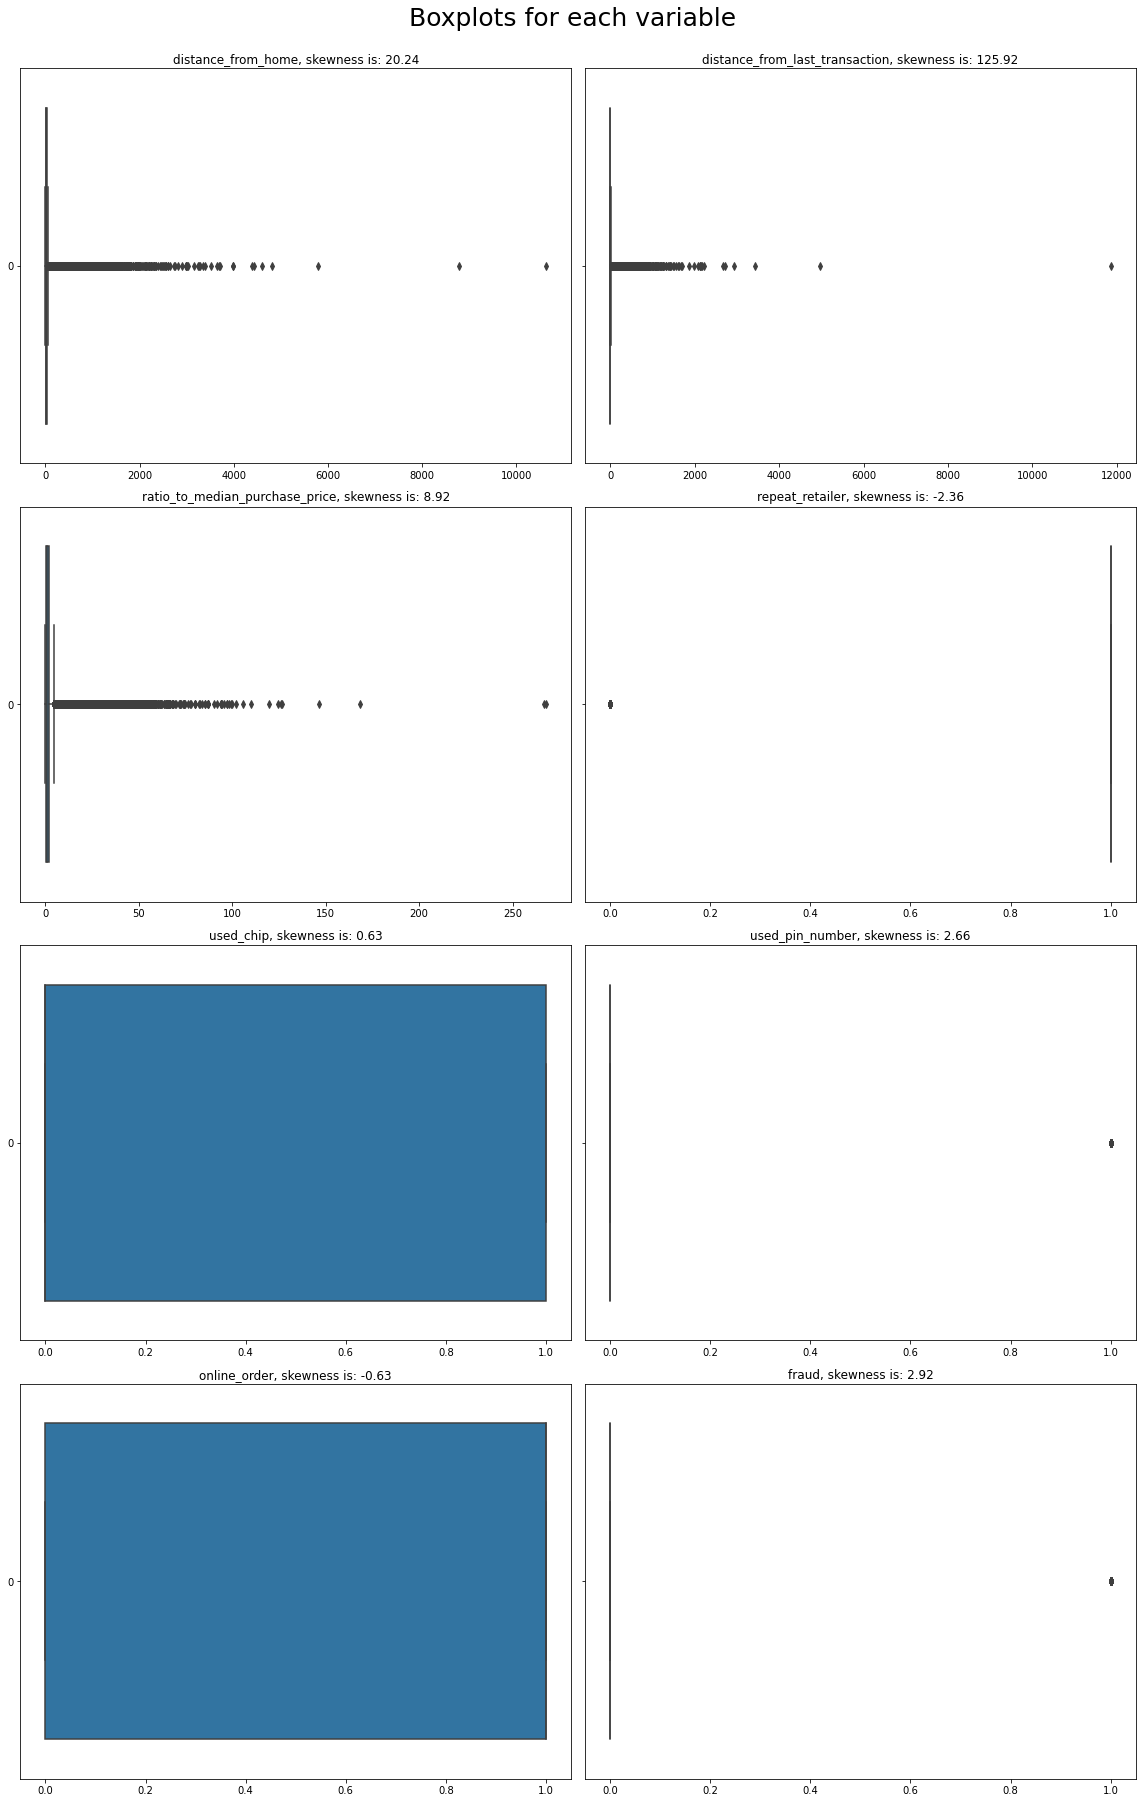

In [24]:
def box(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(
            data + ', skewness is: '+str(
                round(
                    dataset[data].skew(
                        axis = 0, skipna = True
                    ),2
                )
            )
        )
        
box(dataset=df1, columns_list=df.columns, rows=4, cols=2, suptitle='Boxplots for each variable')
plt.tight_layout()

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

kf = StratifiedKFold(n_splits=5, shuffle=False)

In [26]:
x=df1.drop('fraud',axis=1)
y=df1["fraud"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [37]:
rf = RandomForestClassifier(n_estimators=100, random_state=13)
rf1=rf.fit(X_train,y_train)
rf1p=rf1.predict(X_test)



Accuracy_Test=accuracy_score(y_test, rf1p) * 100
Accuracy_Test= str(Accuracy_Test) + " %"

print(Accuracy_Test)



99.99749999999999 %


In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve,roc_curve,roc_auc_score
from sklearn.metrics import auc
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import linear_model,preprocessing
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [36]:
dtree= DecisionTreeClassifier();
dt1=dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
y_pred2=dtree.predict(X_train)

Accuracy_Test=accuracy_score(y_test, y_pred) * 100
Accuracy_Test= str(Accuracy_Test) + " %"

print(Accuracy_Test)

Accuracy_Train=accuracy_score(y_train, y_pred2) * 100
Accuracy_Train= str(Accuracy_Train) + " %"

print(Accuracy_Train)

Train_Data_Score=dtree.score(X_train, y_train) * 100
Train_Data_Score= str(Train_Data_Score) + " %"

print(Train_Data_Score)

99.998 %
100.0 %
100.0 %


In [38]:
confmat_train = confusion_matrix(y_pred2, y_train)
confmat_test =  confusion_matrix(y_pred, y_test)
print ("\nConfusion matrix of Train Data\n", confmat_train)
print ("\nConfusion matrix of Test Data\n", confmat_test)
total=sum(sum(confmat_test))


Confusion matrix of Train Data
 [[730078      0]
 [     0  69922]]

Confusion matrix of Test Data
 [[182518      3]
 [     1  17478]]


In [40]:
recall = confmat_test[0,0]/(confmat_test[0,0]+confmat_test[0,1]) * 100
recall= str(recall) + " %"

print(recall)

99.99835635351548 %
